In [1]:
# #In this section, you will learn how to approach data acquisition in various ways and obtain necessary insights from a dataset. By the end of this lab, you will successfully load the data into Jupyter Notebook and gain some fundamental insights via the Pandas Library.

In [2]:
#importing pandas lib for reading data into python
import pandas as pd

In [3]:
#Reading the data set
data = pd.read_csv('data.csv')

In [4]:
#Getting acquainted with top and bottom rows of dat. Also the dimensions of the data
data.head()


,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


In [5]:
data.tail()

,title,author,date,views,likes,link
5435,The best stats you've ever seen,Hans Rosling,February 2006,15000000,458000,https://ted.com/talks/hans_rosling_the_best_st...
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...
5437,Greening the ghetto,Majora Carter,February 2006,2900000,88000,https://ted.com/talks/majora_carter_greening_t...
5438,Simplicity sells,David Pogue,February 2006,2000000,60000,https://ted.com/talks/david_pogue_simplicity_s...
5439,Averting the climate crisis,Al Gore,February 2006,3600000,109000,https://ted.com/talks/al_gore_averting_the_cli...


In [6]:
data.shape

(5440, 6)

In [7]:
#Having a statistical overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


In [8]:
#some more statistical overview
data.describe()

,views,likes
count,5.440000e+03,5.440000e+03
mean,2.061576e+06,6.260762e+04
std,3.567098e+06,1.076468e+05
min,5.320000e+02,1.500000e+01
25%,6.707500e+05,2.000000e+04
50%,1.300000e+06,4.050000e+04
75%,2.100000e+06,6.500000e+04
max,7.200000e+07,2.100000e+06


In [9]:
#Identify and handle missing values

In [10]:
missing_data = data.isnull()
missing_data.head(5)

,title,author,date,views,likes,link
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [11]:
#Count missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

title
title
False    5440
Name: count, dtype: int64

author
author
False    5439
True        1
Name: count, dtype: int64

date
date
False    5440
Name: count, dtype: int64

views
views
False    5440
Name: count, dtype: int64

likes
likes
False    5440
Name: count, dtype: int64

link
link
False    5440
Name: count, dtype: int64



In [12]:
##Find the total number of missing values from the entire dataset
data.isnull().sum().sum()

1

In [13]:
#Filling the missing value of author as 'unknown'
data['author'].fillna('unknown', inplace=True)

In [14]:
#Checking again for the missing section
data.isnull().sum().sum()

0

In [15]:
#Correcting data format

In [16]:
data.dtypes

title     object
author    object
date      object
views      int64
likes      int64
link      object
dtype: object

In [17]:
#Visualization Of Bill Gates Talk


In [18]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

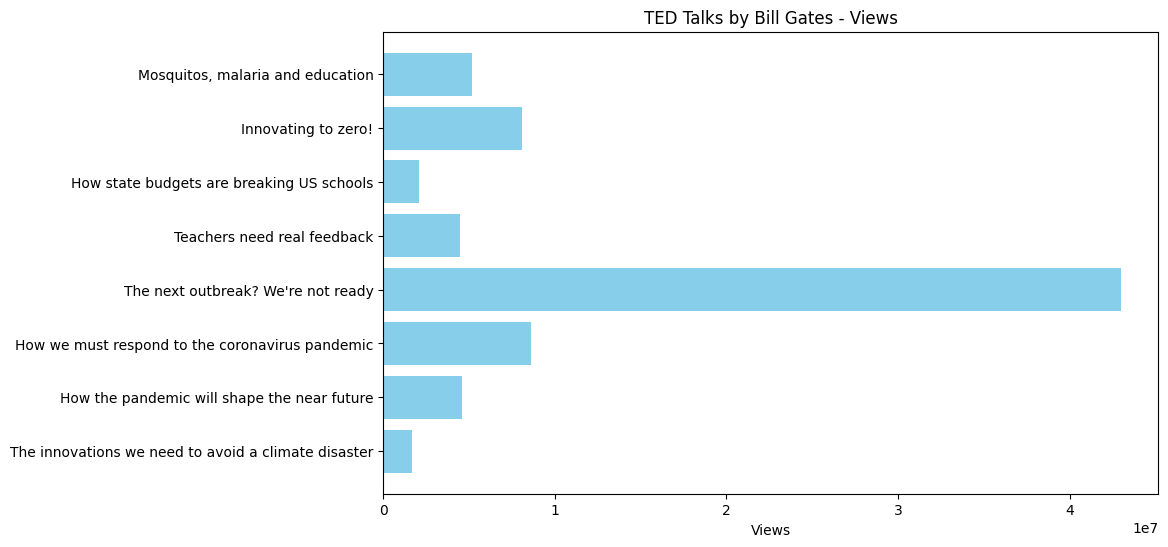

In [19]:

import matplotlib.pyplot as plt
# Filter rows where the author is Bill Gates
bill_gates_talks = data[data['author'] == 'Bill Gates']

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(bill_gates_talks['title'], bill_gates_talks['views'], color='skyblue')
plt.xlabel('Views')
plt.title('TED Talks by Bill Gates - Views')
plt.show()


E:\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


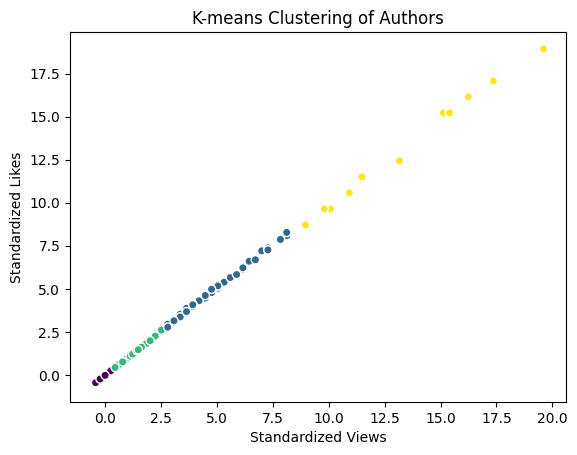

In [24]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'author' column
# Drop irrelevant columns or features that need further preprocessing
X = data[['views', 'likes']]  # Include numerical features you want to use for clustering

# Preprocessing: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (you can experiment with this)
n_clusters = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters (you can modify this based on the number of features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['cluster'], cmap='viridis', marker='o', edgecolors='w')
plt.title('K-means Clustering of Authors')
plt.xlabel('Standardized Views')
plt.ylabel('Standardized Likes')
plt.show()


In [21]:
#Total Likes:

In [22]:
total_likes =data.groupby(by='author').sum()['likes']
total_likes 

author
 B.E.A.T. NYC              98
 Beautyrest              1800
 Belle and Sebastian      690
 Butterscotch             933
 Climbing PoeTree         367
                        ...  
iO Tillett Wright       93000
monday.com                181
tobacco brown           40000
unknown                    15
Özlem Cekic             60000
Name: likes, Length: 4444, dtype: int64